In [74]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)

#Funciones
import sys
sys.path.append("../")
from src import sp_abtest as sab
import importlib
importlib.reload(sab) 
#Visualización
import matplotlib.pyplot  as plt
import seaborn as sns

In [45]:
import scipy.stats as stats

In [3]:
df = pd.read_csv("../Data/datos_limpios_nonulos.csv")
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
1461,1462,b,2022-03-15,0,electronics,1784,headphones,0,0.03,0.00,no_conversion,no_conversion,east,18.0,f,mobile,13,no_conversion,other,paid,no,900.10
278,279,b,2022-03-03,0,electronics,1633,laptop,0,0.29,0.00,no_conversion,no_conversion,west,33.0,m,mobile,12,no_conversion,chrome,paid,no,987.72
84,85,a,2022-01-16,0,books,1938,mystery,0,0.04,0.00,no_conversion,no_conversion,east,42.0,f,mobile,20,no_conversion,other,paid,no,13.34
613,614,a,2022-02-11,0,sports,1143,football,0,0.08,0.00,no_conversion,no_conversion,north,52.0,m,tablet,12,no_conversion,chrome,email,no,163.12
1837,1838,a,2022-03-07,1,sports,1774,running_shoes,4,0.24,137.74,bank_transfer,standard,central,27.0,m,mobile,27,no,firefox,email,yes,45.31


In [4]:
df['group'].value_counts()

group
b    1013
a     987
Name: count, dtype: int64

In [37]:
sab.exploracion_df_abtest(df,'group')
  

Los principales estadisticos de la columna A son :


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashhion,165
product_name,987,28,jeans,49
payment_method,987,5,no_conversion,886
shipping_method,987,4,no_conversion,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_conversion,886


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.500,983.000000,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.000,0.000000,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.000,1495.000000,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.000,0.000000,0.00,5.00
discount,987.0,0.152396,0.085578,0.00,0.080,0.150224,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.000,0.000000,0.00,2899.50
customer_age,987.0,43.584600,15.263729,18.00,30.500,42.000000,56.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.000,16.000000,23.00,30.00
price_knn,987.0,182.785984,209.210432,5.02,47.435,99.950000,232.75,998.88


Los principales estadisticos de la columna B son :


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashhion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_conversion,867
shipping_method,1013,4,no_conversion,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_conversion,867


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.00,1501.00,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.00,0.00,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.00,1736.00,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.00,0.00,5.00
discount,1013.0,0.148109,0.085847,0.00,0.07,0.15,0.22,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.00,0.00,2904.07
customer_age,1013.0,42.693978,15.148251,18.00,29.00,42.00,56.00,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.00,23.00,30.00
price_knn,1013.0,186.312447,210.559922,5.34,45.85,111.97,230.83,995.65


In [38]:
df.sample(4)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
919,920,a,2022-03-25,0,home,1679,lamp,0,0.27,0.0,no_conversion,no_conversion,north,70.0,f,desktop,22,no_conversion,safari,social,no,374.740000
1310,1311,a,2022-01-21,0,toys,1220,action_figure,0,0.13,0.0,no_conversion,no_conversion,west,21.0,m,mobile,23,no_conversion,safari,organic,no,23.260000
750,751,a,2022-01-07,0,fashhion,1577,sneakers,0,0.28,0.0,no_conversion,no_conversion,south,51.0,m,mobile,6,no_conversion,edge,organic,no,45.550000
1172,1173,b,2022-02-11,0,home,1191,table,0,0.13,0.0,no_conversion,no_conversion,central,67.0,m,desktop,13,no_conversion,edge,social,no,184.572138


# Métricas a estudiar
- conversion
- total_value
- session_duration
- quantity

/var/folders/9v/ywckf1yx11v0chhngc__5zqh0000gn/T/ipykernel_84106/3187962565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='conversion', data=df, ax=axes[0], palette='cool')
/var/folders/9v/ywckf1yx11v0chhngc__5zqh0000gn/T/ipykernel_84106/3187962565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='total_value', data=df, ax=axes[1], palette='cool')
/var/folders/9v/ywckf1yx11v0chhngc__5zqh0000gn/T/ipykernel_84106/3187962565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='session_duration', d

Text(0.5, 1.0, 'Cantidad')

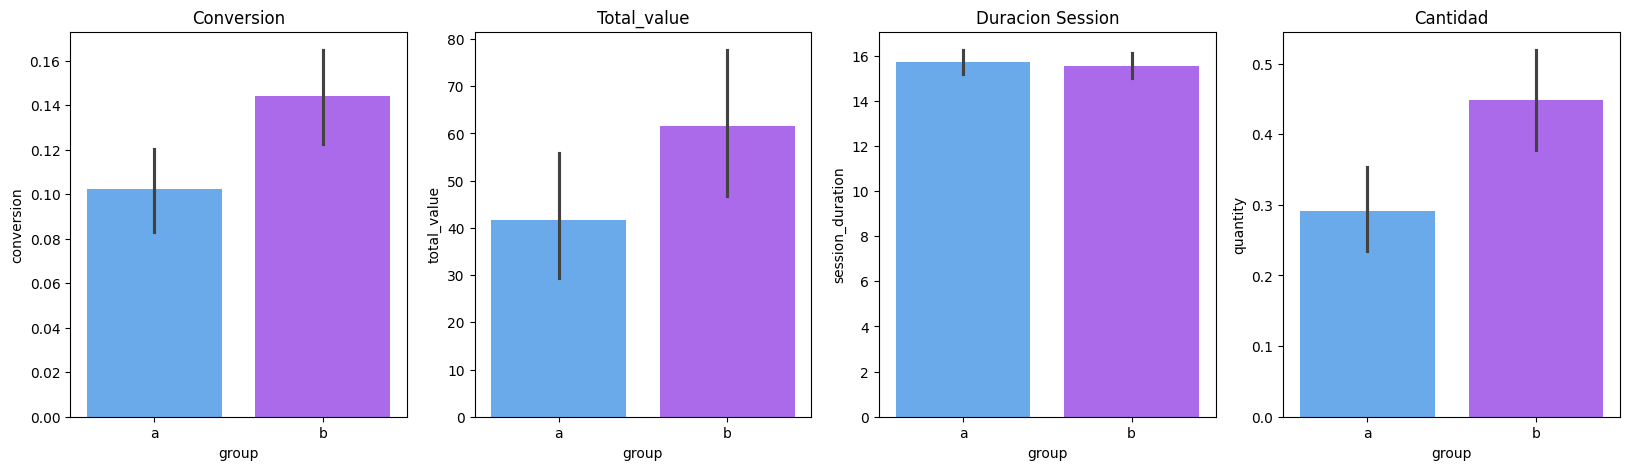

In [44]:
fig, axes = plt.subplots( nrows=1, ncols=4, figsize=(20,5) )
sns.barplot(x='group', y='conversion', data=df, ax=axes[0], palette='cool')
axes[0].set_title('Conversion')
sns.barplot(x='group', y='total_value', data=df, ax=axes[1], palette='cool')
axes[1].set_title('Total_value')
sns.barplot(x='group', y='session_duration', data=df, ax=axes[2], palette='cool')
axes[2].set_title('Duracion Session')
sns.barplot(x='group', y='quantity', data=df, ax=axes[3], palette='cool')
axes[3].set_title('Cantidad')

In [52]:
metricas = ['conversion', 'total_value','session_duration','quantity']

In [55]:
sab.normalidad(df,metricas)

Para la columna CONVERSION no siguen una distribución normal
Para la columna TOTAL_VALUE no siguen una distribución normal
Para la columna SESSION_DURATION no siguen una distribución normal
Para la columna QUANTITY no siguen una distribución normal


# Comprobacion homogeneidad

In [69]:
sab.homocedasticidad(df,'group',metricas)


Para la columna CONVERSION las varianzas no son homogenes entre grupos, no hay homogenesticidad
Para la columna TOTAL_VALUE las varianzas no son homogenes entre grupos, no hay homogenesticidad
Para la columna SESSION_DURATION las varianzas no son homogenes entre grupos, no hay homogenesticidad
Para la columna QUANTITY las varianzas no son homogenes entre grupos, no hay homogenesticidad


In [71]:
valores_control=df['group'].unique()
control = df[df['group']== valores_control[0]]['conversion']
test = df[df['group']== valores_control[1]]['conversion']
statistic, pvalue = stats.mannwhitneyu(control,test)
if pvalue>0.05:
  print(f'Para la metrica conversion, las medianas son iguales, es decir no hay diferencias significativas entre grupos')
else:
  print(f'Para la metrica conversion, las medianas no son iguales')

Para la metrica conversion, las medianas no son iguales


In [75]:
sab.mannwhitneyu(df,'group',metricas)

Para la metrica CONVERSION, las medianas no son iguales
Para la metrica TOTAL_VALUE, las medianas no son iguales
Para la metrica SESSION_DURATION, las medianas son iguales, es decir no hay diferencias significativas entre grupos
Para la metrica QUANTITY, las medianas no son iguales
